In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#get data
data = pd.read_csv('/content/bank-additional-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**EXPLORATORY DATA ANALYSIS**

1. BASIC DATA SUMMARY

In [5]:
# Checking for column data types, null values, and basic info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Checking the missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_data = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_data)

Columns with missing values:
 Series([], dtype: int64)


In [7]:
# Checking the unique values in categorical columns to understand possible categories
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}:", data[col].unique())

Unique values in job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in marital: ['married' 'single' 'divorced' 'unknown']
Unique values in education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in default: ['no' 'unknown' 'yes']
Unique values in housing: ['no' 'yes' 'unknown']
Unique values in loan: ['no' 'yes' 'unknown']
Unique values in contact: ['telephone' 'cellular']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in poutcome: ['nonexistent' 'failure' 'success']
Unique values in y: ['no' 'yes']


2. DESCRIPTIVE STATISTICS

In [8]:
# Checking the Descriptive statistics for numerical columns
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
#Checking the Frequency counts for categorical columns
for col in categorical_cols:
    print(f"Value counts for {col}:\n", data[col].value_counts(), "\n")

Value counts for job:
 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64 

Value counts for marital:
 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64 

Value counts for education:
 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64 

Value counts for default:
 default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64 

Value counts for housing:
 housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64 

Value c

3. DATA VISUALIZATION

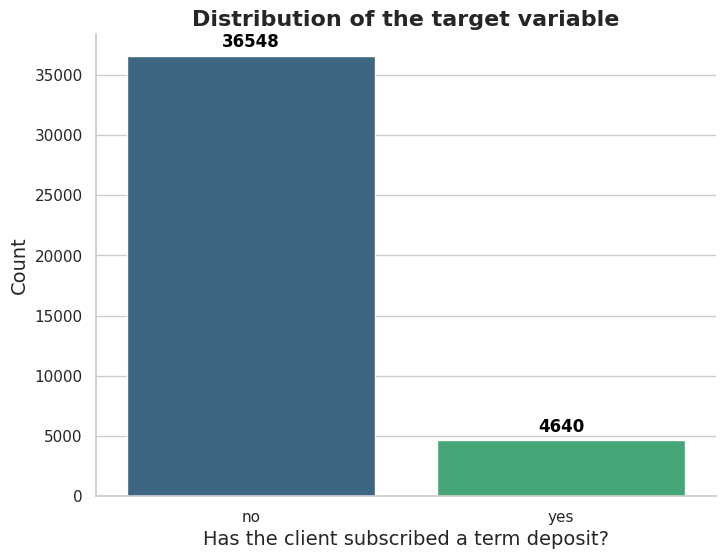

In [10]:
sns.set_theme(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 6))
bar_chart = sns.countplot(x=data['y'], data=data, palette="viridis")

# Add annotations to show counts on top of bars
for p in bar_chart.patches:
    bar_chart.annotate(f'{int(p.get_height())}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'center',
                       xytext = (0, 10),
                       textcoords = 'offset points',
                       fontsize=12, fontweight='bold', color='black')

# Set title and labels
plt.title("Distribution of the target variable", fontsize=16, fontweight='bold')
plt.xlabel("Has the client subscribed a term deposit?", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Remove top and right borders
sns.despine(top=True, right=True)

# Show the plot
plt.show()


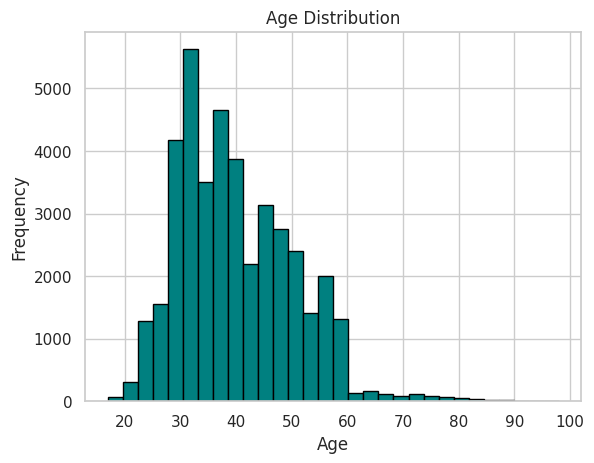

In [11]:
# Histogram for age distribution
data['age'].plot(kind='hist', bins=30, color='teal', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

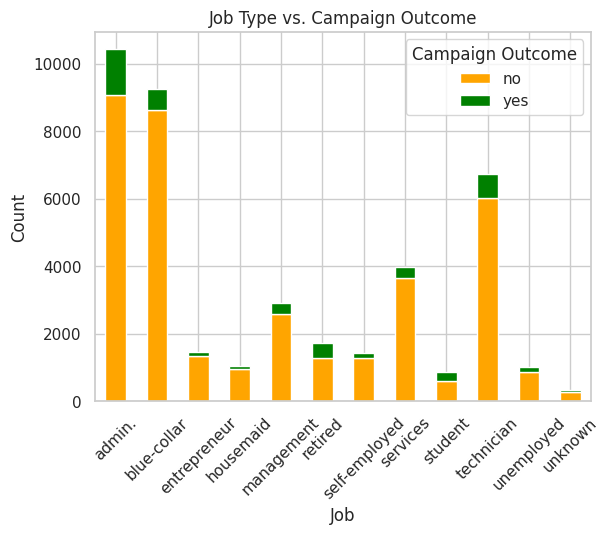

In [12]:
# Count plot for job type based on target variable
data.groupby(['job', 'y']).size().unstack().plot(kind='bar', stacked=True, color=['orange', 'green'])
plt.title('Job Type vs. Campaign Outcome')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='Campaign Outcome')
plt.xticks(rotation=45)
plt.show()

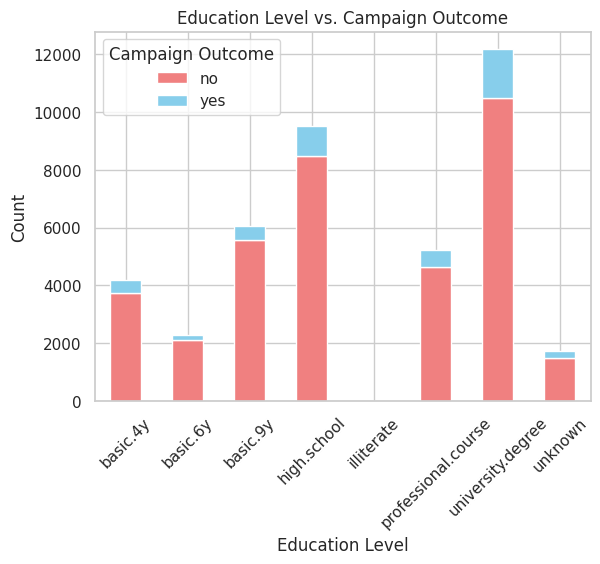

In [13]:
# Stacked bar plot for education level and campaign outcome
data.groupby(['education', 'y']).size().unstack().plot(kind='bar', stacked=True, color=['lightcoral', 'skyblue'])
plt.title('Education Level vs. Campaign Outcome')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Campaign Outcome')
plt.xticks(rotation=45)
plt.show()

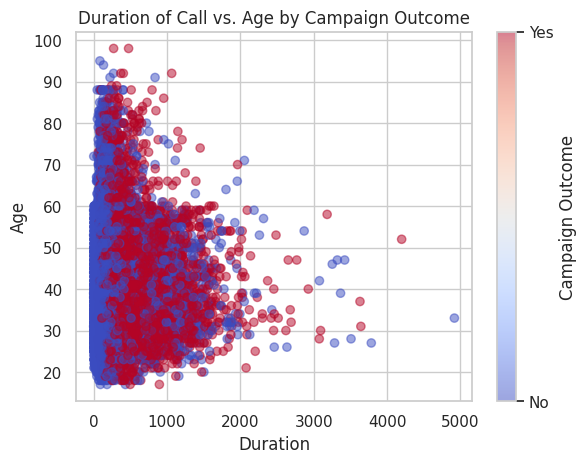

In [14]:
import matplotlib.pyplot as plt

# Convert target variable 'y' to numerical for color mapping
data['y_numeric'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Create scatter plot with color mapping
scatter = plt.scatter(data['duration'], data['age'], c=data['y_numeric'], cmap='coolwarm', alpha=0.5)
plt.title('Duration of Call vs. Age by Campaign Outcome')
plt.xlabel('Duration')
plt.ylabel('Age')

# Add color bar with labels for interpretation
cbar = plt.colorbar(scatter, ticks=[0, 1])
cbar.set_ticklabels(['No', 'Yes'])
cbar.set_label('Campaign Outcome')
plt.show()

4. DATA CLEANING

In [15]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_numeric'],
      dtype='object')

In [16]:
# Replace "unknown" with NaN across the entire DataFrame
data = data.replace("unknown", np.nan)

In [17]:
# Drop the column default
data = data.drop(columns=['default'])
data = data.drop(columns=['y_numeric'])

In [18]:
#Checking the missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_data = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_data)

Columns with missing values:
 job           330
marital        80
education    1731
housing       990
loan          990
dtype: int64


In [19]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the following column
data['education_encoded'] = label_encoder.fit_transform(data['education'])

In [20]:
#one-hot encoding

# Perform one-hot encoding on the following column
data_encoded = pd.get_dummies(data, columns=['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y',], drop_first=True)

In [21]:
data_encoded.columns

Index(['age', 'education', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'education_encoded', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single', 'housing_yes',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [22]:
data = data_encoded[['age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'education_encoded', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'housing_yes',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'
]]

In [23]:
from sklearn.impute import KNNImputer

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)  # You can tune n_neighbors

# Apply KNN imputation
df = pd.DataFrame(knn_imputer.fit_transform(data), columns=data.columns)

In [24]:
#Checking the missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_data = missing_values[missing_values > 0]
print("Columns with missing values:\n", missing_data)

Columns with missing values:
 Series([], dtype: int64)


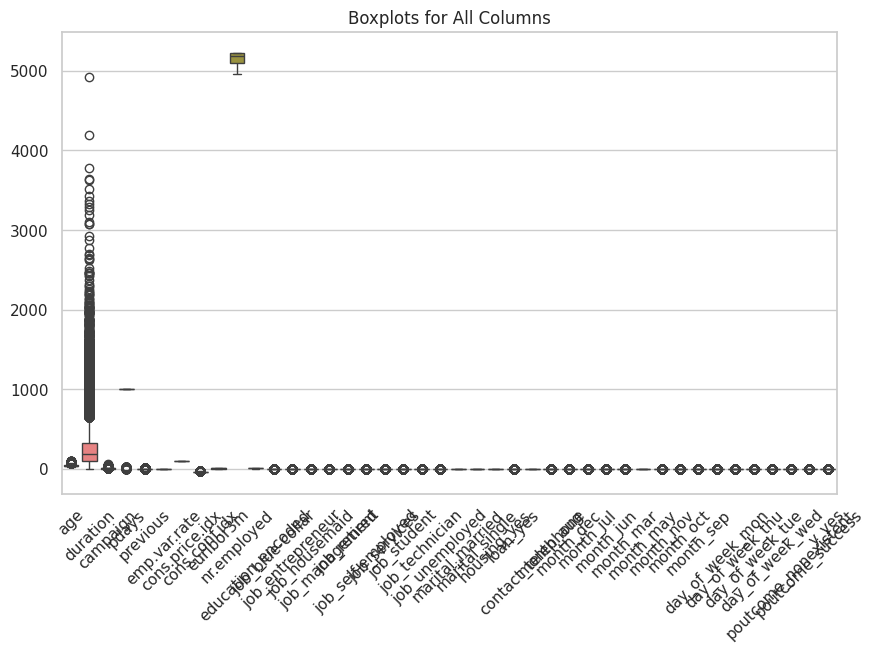

In [25]:
# Plotting boxplots for all columns to check the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for All Columns")
plt.show()

In [26]:
# Function to replace outliers with the maximum non-outlier value in each column
def replace_outliers_with_max(df):
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            # Define outlier bounds
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Find the max non-outlier value
            max_non_outlier = df[column][df[column] <= upper_bound].max()
            # Replace outliers with the max non-outlier value
            df[column] = np.where(df[column] > upper_bound, max_non_outlier, df[column])
            # Find the min non - outlier value
            min_non_outlier = df[column][df[column] >= lower_bound].min()
            df[column] = np.where(df[column] < lower_bound, min_non_outlier, df[column])

replace_outliers_with_max(df)

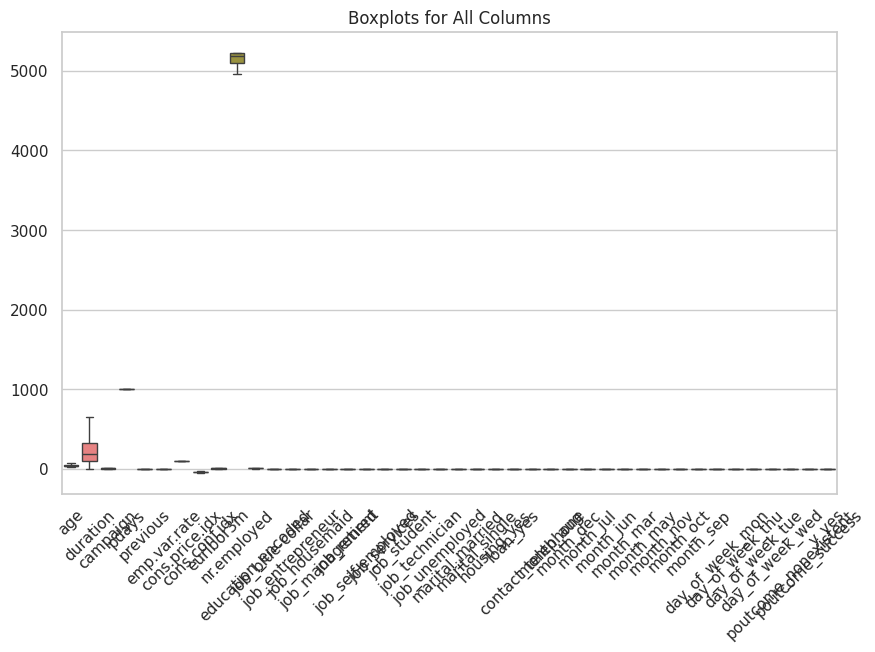

In [27]:
# Plotting boxplots for all columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots for All Columns")
plt.show()

HANDLING IMBALANCED DATA

In [28]:
pip install imbalanced-learn

In [38]:
data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'education_encoded', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'housing_yes', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_yes'],
      dtype='object')

In [29]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [30]:
#Split data into training and test sets
X = data.drop('y_yes', axis=1)
y = data['y_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
#Handle imbalance with Borderline-SMOTE
borderline_smote = BorderlineSMOTE(random_state=42, kind='borderline-1')
X_train_resampled, y_train_resampled = borderline_smote.fit_resample(X_train, y_train)

In [32]:
#Apply scaling to both training and test sets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Fit on resampled training data
X_test_scaled = scaler.transform(X_test)  # Transform test data

In [36]:
import pickle

In [37]:
# Save the scaler to a file
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [33]:
#Train the classifier on the balanced, scaled data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [34]:
#Evaluate the classifier
y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8807963097839281
              precision    recall  f1-score   support

       False       0.94      0.92      0.93      7303
        True       0.48      0.55      0.51       935

    accuracy                           0.88      8238
   macro avg       0.71      0.74      0.72      8238
weighted avg       0.89      0.88      0.88      8238



In [35]:
### Create a Pickle file using serialization
import pickle
pickle_out = open("clf.pkl","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()